In [122]:
import os
os.getcwd()
os.chdir('C:\\Users\\dell\\DS-Data files')

In [123]:
import pandas as pd
import numpy as np

In [124]:
data=pd.read_csv('Elon_musk.csv',encoding='latin1',index_col=0)
stop=pd.read_csv('stop (1).txt')

In [125]:
data.head()

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [126]:
data.isnull().sum()

Text    0
dtype: int64

In [127]:
data.duplicated().sum()

2

In [128]:
data.drop_duplicates(inplace=True)

In [129]:
data.reset_index(drop=True,inplace=True)

In [130]:
data.shape

(1997, 1)

In [131]:
import re

In [132]:
def remove_pattern(text,pattern):
    x=re.findall(pattern,text)
    for i in x:
        text=re.sub(i,'',text)
        
    return text

In [133]:
data['cleanedText']=data['Text'].apply(lambda x:remove_pattern(x,'@\w*'))
data.head()

,Text,cleanedText
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [134]:
data['cleanedText']=data['cleanedText'].apply(lambda x:remove_pattern(x,'[0-9]*'))
data.head()

,Text,cleanedText
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [135]:
data['cleanedText']=data['cleanedText'].apply(lambda x:remove_pattern(x,'[]*'))
data.head()

,Text,cleanedText
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [136]:
data['cleanedText']=data['cleanedText'].apply(lambda x:remove_pattern(x,'https://t.co/[\w]*'))

In [137]:
data['cleanedText']=data['cleanedText'].apply(lambda x:remove_pattern(x,'<U+[\w]*'))

In [138]:
data['cleanedText']=data['cleanedText'].apply(lambda x:remove_pattern(x,'&amp;[\w]*'))

In [139]:
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk import word_tokenize
from nltk import PorterStemmer

In [140]:
stop_words=list(stopwords.words('english'))+list(punctuation)+list(stop)

In [141]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [142]:
data['tokenize']=[nltk.word_tokenize(x) for x in data['cleanedText']]
data.head()

,Text,cleanedText,tokenize
0,@kunalb11 Im an alien,Im an alien,"[Im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,"[Ray, tracing, on, Cyberpunk, with, HDR, is, n..."
2,@joerogan @Spotify Great interview!,Great interview!,"[Great, interview, !]"
3,@gtera27 Doge is underestimated,Doge is underestimated,"[Doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,"[Congratulations, Tesla, China, for, amazing, ..."


In [143]:
data['tokenize']=data['tokenize'].apply(lambda x: [ word for word in x if word not in stop_words ])

In [144]:
data.head()

,Text,cleanedText,tokenize
0,@kunalb11 Im an alien,Im an alien,"[Im, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,"[Ray, tracing, Cyberpunk, HDR, next-level, Hav..."
2,@joerogan @Spotify Great interview!,Great interview!,"[Great, interview]"
3,@gtera27 Doge is underestimated,Doge is underestimated,"[Doge, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,"[Congratulations, Tesla, China, amazing, execu..."


In [145]:
stemm=PorterStemmer()
data['tokenize']=data['tokenize'].apply(lambda x: [stemm.stem(i) for i in x])

In [146]:
data.head()

,Text,cleanedText,tokenize
0,@kunalb11 Im an alien,Im an alien,"[im, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,"[ray, trace, cyberpunk, hdr, next-level, have,..."
2,@joerogan @Spotify Great interview!,Great interview!,"[great, interview]"
3,@gtera27 Doge is underestimated,Doge is underestimated,"[doge, underestim]"
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,"[congratul, tesla, china, amaz, execut, last, ..."


In [147]:
data['tokenize']=data['tokenize'].apply(lambda x :' '.join(x))

In [148]:
data.head()

,Text,cleanedText,tokenize
0,@kunalb11 Im an alien,Im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,ray trace cyberpunk hdr next-level have tri
2,@joerogan @Spotify Great interview!,Great interview!,great interview
3,@gtera27 Doge is underestimated,Doge is underestimated,doge underestim
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,congratul tesla china amaz execut last year no...


In [149]:
# for wordclouding we are going to merge all rows into one
all_word=' '.join([x for x in data['tokenize']])

In [150]:
all_word

"im alien ray trace cyberpunk hdr next-level have tri great interview doge underestim congratul tesla china amaz execut last year now next even happi new year ox frodo underdog all thought would fail himself haha thank inde tweet definit repres real-world time alloc the entertain outcom like just sent just agre clubhous  it get real bought dogecoin lil x toddler hodler he definit issu sentenc seem bit high thank fix pleas unlock account +f +f thi true power haha ani crypto wallet wont give privat key avoid cost your app suck rt nasa select falcon heavi launch first two element lunar gateway togeth one mission ye onc predict cash flow reason well starlink ipo starlink staggeringli difficult technic econom endeavor howev spacex need pass deep chasm neg cash flow next year lowest cost per ton carbon sequest net valu product made must scalabl g it meant price countri onli differ tax ship thi intend earth may idea appli mar +f +f xprize team manag m carbon captur prize everyon tesla receiv 

In [151]:
from textblob import TextBlob

In [152]:
polarity=[]
for i in data['tokenize']:
    text=TextBlob(i)
    polarity.append(text.sentiment[0])

In [153]:
data['senti']=polarity

In [154]:
data.head()

,Text,cleanedText,tokenize,senti
0,@kunalb11 Im an alien,Im an alien,im alien,-0.25
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,ray trace cyberpunk hdr next-level have tri,0.00
2,@joerogan @Spotify Great interview!,Great interview!,great interview,0.80
3,@gtera27 Doge is underestimated,Doge is underestimated,doge underestim,0.00
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,congratul tesla china amaz execut last year no...,0.00


In [155]:
data.drop(columns=['Text','cleanedText'],axis=1,inplace=True)

In [156]:
data.head()

,tokenize,senti
0,im alien,-0.25
1,ray trace cyberpunk hdr next-level have tri,0.00
2,great interview,0.80
3,doge underestim,0.00
4,congratul tesla china amaz execut last year no...,0.00


In [157]:
data['target']=data['senti'].apply(lambda x: 1 if x>0.0 else 0 if x==0.0 else 2  )

In [158]:
data.head()

,tokenize,senti,target
0,im alien,-0.25,2
1,ray trace cyberpunk hdr next-level have tri,0.00,0
2,great interview,0.80,1
3,doge underestim,0.00,0
4,congratul tesla china amaz execut last year no...,0.00,0


In [159]:
data.drop('senti',axis=1,inplace=True)

In [160]:
data.head(15)

,tokenize,target
0,im alien,2
1,ray trace cyberpunk hdr next-level have tri,0
2,great interview,1
3,doge underestim,0
4,congratul tesla china amaz execut last year no...,0
5,happi new year ox,1
6,frodo underdog all thought would fail himself,2
7,haha thank,1
8,inde tweet definit repres real-world time alloc,0
9,the entertain outcom like,0


In [161]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [162]:
# wordcloud
wordcloud=WordCloud(width=500,height=300,random_state=42,max_font_size=110).generate(all_word)

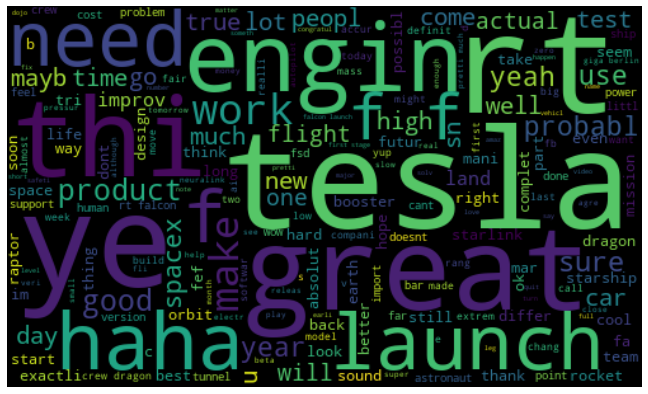

In [163]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [164]:
# negative wordcloud
neg_words = ' '.join([text for text in data['tokenize'][data['target'] == 2]])

In [165]:
neg_words=WordCloud(width=500,height=300,random_state=42,max_font_size=110).generate(neg_words)

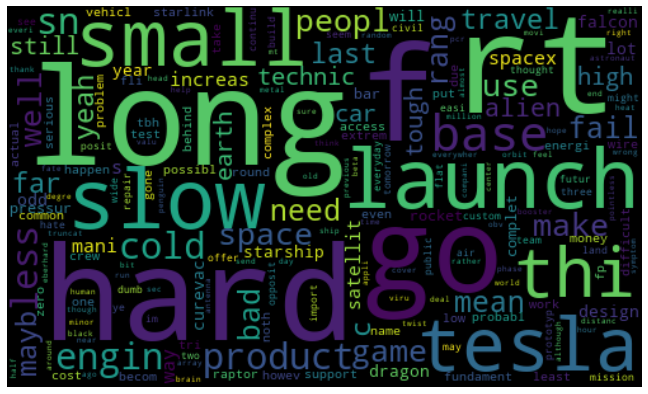

In [166]:
plt.figure(figsize=(15,7))
plt.imshow(neg_words,interpolation='bilinear')
plt.axis('off')
plt.show()

In [167]:
# possitive wordcloud
pos_words = ' '.join([text for text in data['tokenize'][data['target'] == 1]])

In [168]:
pos_words=WordCloud(width=500,height=300,random_state=42,max_font_size=110).generate(pos_words)

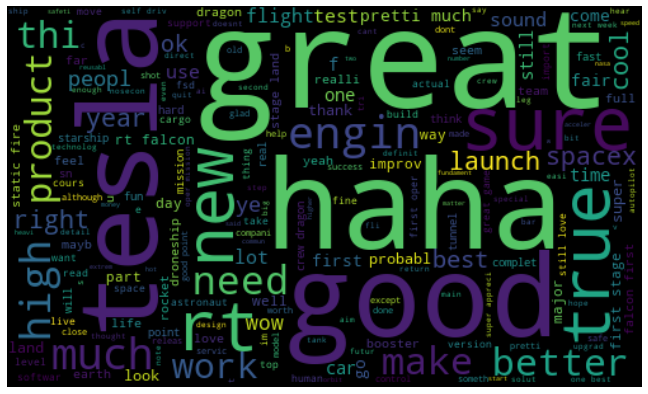

In [169]:
plt.figure(figsize=(15,7))
plt.imshow(pos_words,interpolation='bilinear')
plt.axis('off')
plt.show()

### now we are using countvector and other methods and check which is the best for


In [170]:
data1=data.drop_duplicates()

In [171]:
data1.groupby('target').describe()

tokenize                                                         
          count unique                                          top freq
target                                                                  
0           932    932  ray trace cyberpunk hdr next-level have tri    1
1           576    576                              great interview    1
2           164    164                                     im alien    1

In [172]:
data['length']=data['tokenize'].apply(len)

In [173]:
data.head()

,tokenize,target,length
0,im alien,2,8
1,ray trace cyberpunk hdr next-level have tri,0,43
2,great interview,1,15
3,doge underestim,0,15
4,congratul tesla china amaz execut last year no...,0,57


In [174]:
import seaborn as sns

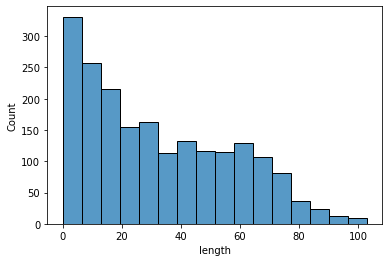

In [175]:
sns.histplot(data['length'])
plt.show()

### CountVector with Logistic Regression

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [177]:
countv=CountVectorizer()
cv_text=countv.fit_transform(data['tokenize'])

In [178]:
print(countv.get_feature_names())

['00', '000f9', '10', '10m', '212', '26', '2mph', '2pm', '3a', '5pm', '79', '_lsp', 'aber', 'abl', 'abo', 'aboard', 'abort', 'about', 'abov', 'absenc', 'absolut', 'absorb', 'absorpt', 'absurd', 'absurdli', 'ac', 'academia', 'accel', 'acceler', 'accelera', 'accept', 'access', 'accid', 'accident', 'accommod', 'account', 'accur', 'accura', 'accuraci', 'ace', 'achi', 'achiev', 'acquisit', 'across', 'action', 'activ', 'actual', 'actuari', 'ad', 'adagio', 'add', 'addit', 'address', 'administ', 'adult', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'aero', 'afb', 'affair', 'affect', 'afford', 'africa', 'after', 'afternoon', 'age', 'ago', 'agoni', 'agre', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplan', 'ak', 'aka', 'alert', 'alexand', 'algo', 'algorithm', 'alien', 'align', 'all', 'alloc', 'allocati', 'allow', 'alloy', 'almost', 'aloha', 'alon', 'along', 'alpha', 'alreadi', 'also', 'altho', 'although', 'altit', 'altitud', 'alto', 'aluminum', 'alway', 'am', 'a

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [180]:
sm=SMOTE(random_state=42)

In [181]:
x=cv_text
y=data['target']

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [183]:
l_r=LogisticRegression(penalty='l2',random_state=0)
model=l_r.fit(x_train,y_train)

In [184]:
model.score(x_train,y_train)

0.8966503267973857

In [185]:
y_pred=model.predict(x_test)

In [186]:
accuracy_score(y_pred,y_test)

0.66

In [187]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       279
           1       0.79      0.90      0.84       168
           2       0.42      0.14      0.21       153

    accuracy                           0.66       600
   macro avg       0.61      0.61      0.59       600
weighted avg       0.62      0.66      0.62       600



In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [189]:
nb=MultinomialNB()
model=nb.fit(x_train,y_train)

In [190]:
model.score(x_train,y_train)

0.6899509803921569

In [191]:
y_pred=model.predict(x_test)

In [192]:
accuracy_score(y_pred,y_test)

0.6783333333333333

In [193]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       266
           1       0.81      0.67      0.73       228
           2       0.48      0.24      0.32       106

    accuracy                           0.68       600
   macro avg       0.64      0.59      0.59       600
weighted avg       0.67      0.68      0.66       600



### now we are using TF-IDF

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [195]:
tfidf=TfidfVectorizer()
tf_text=tfidf.fit_transform(data['tokenize'])

In [196]:
x=tf_text
y=data['target']

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [198]:
y_test.value_counts()

0    358
1    190
2     52
Name: target, dtype: int64

In [199]:
y_train.value_counts()

0    816
2    816
1    816
Name: target, dtype: int64

In [200]:
l_r2=LogisticRegression(random_state=42)

In [201]:
model2=l_r2.fit(x_train,y_train)

In [202]:
model2

LogisticRegression(random_state=42)

In [203]:
model2.score(x_train,y_train)

0.9926470588235294

In [204]:
model2.score(x_test,y_test,)

0.8133333333333334

In [205]:
y_pred=model2.predict(x_test)

In [206]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       425
           1       0.71      0.89      0.79       150
           2       0.29      0.60      0.39        25

    accuracy                           0.81       600
   macro avg       0.65      0.76      0.68       600
weighted avg       0.86      0.81      0.83       600



### Now we are using naive bayes

In [207]:
from sklearn.naive_bayes import MultinomialNB

In [208]:
nb=MultinomialNB()
nb_model=nb.fit(x_train,y_train)

In [209]:
nb_model.score(x_train,y_train)

0.9665032679738562

In [210]:
nb_model.score(x_test,y_test)

0.71

In [211]:
y_pred=nb_model.predict(x_test)

In [212]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       293
           1       0.81      0.69      0.74       221
           2       0.44      0.27      0.33        86

    accuracy                           0.71       600
   macro avg       0.65      0.60      0.62       600
weighted avg       0.70      0.71      0.70       600

